## Clase Laboratorio IA 28/03/2024 ##

### Uso de Machine Learning con Scikit Learn ###

#### Una tienda comercial quiere predicir la venta de 1000 celulares que tienen en stock

#### Importamos las clases que usaremos

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

#### Aqui generamos los datos simulados para ventas de celulares

In [2]:
np.random.seed(0)
n_samples = 1000  # Número de muestras
celulares_vendidos = np.random.randint(100, 1000, size=n_samples)  # Número de celulares vendidos (aleatorio entre 100 y 1000)
precio_por_celular = np.random.uniform(50, 500, size=n_samples)  # Precio por celular (aleatorio entre 50 y 500)
ingresos = celulares_vendidos * precio_por_celular  # Ingresos generados por las ventas

#### Creamos el DataFrame con los datos aleatorios

In [3]:
df_ventas = pd.DataFrame({'Celulares Vendidos': celulares_vendidos,
                          'Precio por Celular': precio_por_celular,
                          'Ingresos': ingresos})

#### Mostramos las primeras filas del DataFrame

In [4]:
print(df_ventas.head())

   Celulares Vendidos  Precio por Celular       Ingresos
0                 784          465.056592  364604.367978
1                 659          293.621357  193496.474389
2                 729          465.487731  339340.555571
3                 292          423.453816  123648.514234
4                 935          485.728885  454156.507131


#### Análisis básico de los datos

In [5]:
print("\nResumen estadístico:")
print(df_ventas.describe())


Resumen estadístico:
       Celulares Vendidos  Precio por Celular       Ingresos
count         1000.000000         1000.000000    1000.000000
mean           554.427000          279.391370  154204.942818
std            262.237173          133.430893  108004.596696
min            100.000000           50.245684    6758.248264
25%            319.750000          168.993104   66282.603442
50%            547.500000          275.712970  124671.752163
75%            781.500000          397.988704  223090.551254
max            999.000000          499.913860  481460.717004


#### Visualizamos de las ventas de celulares

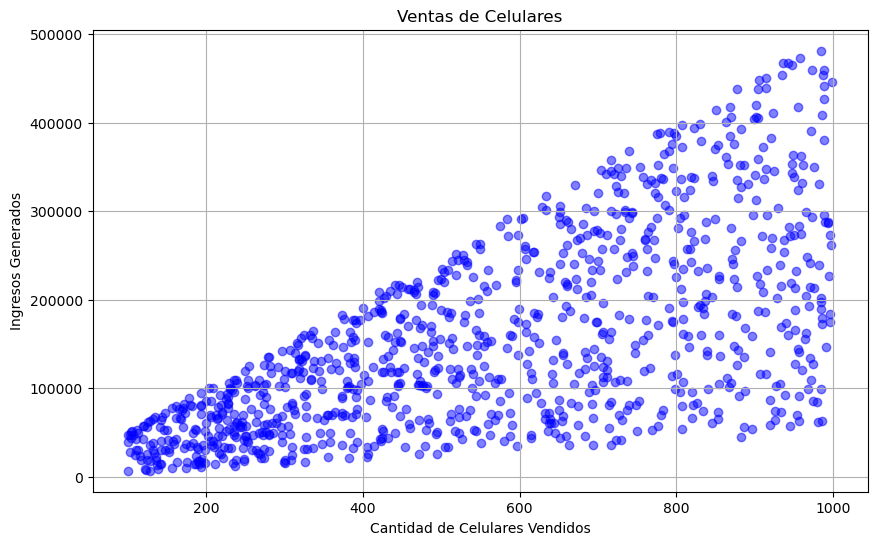

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(df_ventas['Celulares Vendidos'], df_ventas['Ingresos'], color='blue', alpha=0.5)
plt.title('Ventas de Celulares')
plt.xlabel('Cantidad de Celulares Vendidos')
plt.ylabel('Ingresos Generados')
plt.grid(True)
plt.show()

#### Creamos el modelo de regresión lineal

In [7]:
lin_reg = LinearRegression()

#### Ajustamos el modelo a los datos

In [8]:
lin_reg.fit(df_ventas['Celulares Vendidos'].values.reshape(-1, 1), df_ventas['Ingresos'].values)

LinearRegression()

#### Mostramos los coeficientes del modelo

In [9]:
print("\nCoeficiente de la regresión:", lin_reg.coef_[0])
print("Intercepto de la regresión:", lin_reg.intercept_)


Coeficiente de la regresión: 272.74535910114514
Intercepto de la regresión: 2987.551607483503


#### Realizamos la predicción para más de 100 celulares vendidos (por ejemplo, 800)

In [10]:
celulares_vendidos_pred = np.array([[800]])
ingresos_pred = lin_reg.predict(celulares_vendidos_pred)
print('Ingresos predichos para 800 celulares vendidos:', ingresos_pred[0])

Ingresos predichos para 800 celulares vendidos: 221183.83888839962


#### Hacemos la predicción para valores mínimos y máximos de celulares vendidosi

In [11]:
X_min_max = np.array([[df_ventas["Celulares Vendidos"].min()], [df_ventas["Celulares Vendidos"].max()]])
y_pred = lin_reg.predict(X_min_max)
print('Ingresos predichos para mínimos y máximos de celulares vendidos:', y_pred)

Ingresos predichos para mínimos y máximos de celulares vendidos: [ 30262.0875176  275460.16534953]


#### Y hacemos la visualización con la regresión lineal

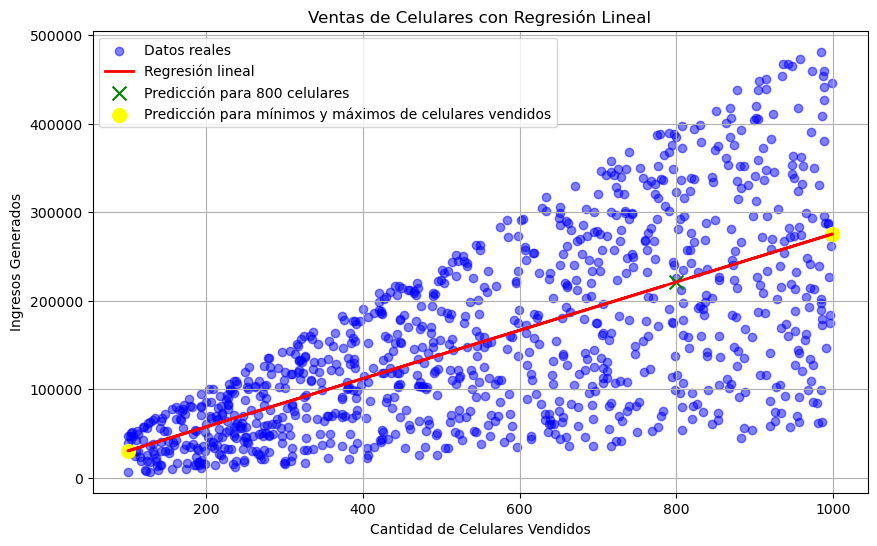

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(df_ventas['Celulares Vendidos'], df_ventas['Ingresos'], color='blue', alpha=0.5, label='Datos reales')
plt.plot(df_ventas['Celulares Vendidos'], lin_reg.predict(df_ventas['Celulares Vendidos'].values.reshape(-1, 1)), color='red', linewidth=2, label='Regresión lineal')
plt.scatter(celulares_vendidos_pred, ingresos_pred, color='green', marker='x', s=100, label='Predicción para 800 celulares')
plt.scatter(X_min_max, y_pred, color='yellow', marker='o', s=100, label='Predicción para mínimos y máximos de celulares vendidos')
plt.title('Ventas de Celulares con Regresión Lineal')
plt.xlabel('Cantidad de Celulares Vendidos')
plt.ylabel('Ingresos Generados')
plt.legend()
plt.grid(True)
plt.show()